# Full simulations of mean- vs fluctuation-driven sequence generation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

from disp import set_plot

In [2]:
from ntwk import SoftmaxNtwk

In [3]:
D = 16

mself = np.eye(D, dtype=bool)
mseq = np.diag(np.ones(D-1), -1).astype(bool)
mseq[0, -1] = True  # periodic

t_max = 300
t = np.arange(t_max)

## Mean-driven sequence network (starting from mean-self-coupled network)

In [4]:
N = 2000

MU_J_SELF = 3
MU_J_CROSS = 0
MU_J_SEQ = 3

SGM_J_SELF = 1
SGM_J_CROSS = 1
SGM_J_SEQ = 1

SGM_J = np.nan*np.zeros((D, D))
MU_J = np.nan*np.zeros((D, D))

MU_J[mself] = MU_J_SELF
MU_J[~mself] = MU_J_CROSS
MU_J[mseq] = MU_J_SEQ

SGM_J[mself] = SGM_J_SELF
SGM_J[~mself] = SGM_J_CROSS
SGM_J[mseq] = SGM_J_SEQ

J = np.nan*np.zeros((D, D, N, N))

for d_to in range(D):
    for d_from in range(D):
        J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N)*np.random.randn(N, N) + MU_J[d_to, d_from]*D/N

ntwk = SoftmaxNtwk(J)

x_0 = np.random.randn(N, D)
x_0[:, :10] *= 5
g = np.inf
t, xs, ys = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=20)

ths = ys.mean(axis=1)

..............

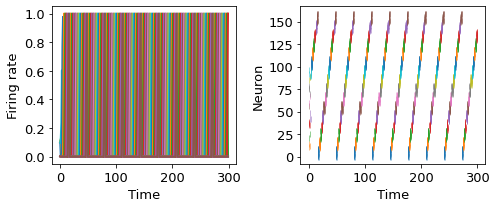

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True)

# activations
axs[0].plot(ths, lw=2)

nplot_cotuned = 10

for d in range(D):
    inrns = np.random.permutation(N)[:nplot_cotuned]
    tspks, cspks = ys[:, inrns, d].nonzero()
    axs[1].scatter(tspks, cspks+d*nplot_cotuned, marker='|', lw=.5)
    
set_plot(axs[0], x_label='Time', y_label='Firing rate', font_size=13)
set_plot(axs[1], x_label='Time', y_label='Neuron', font_size=13)

fig.savefig('figs/main/5_seq_mean_full.svg')

# Variance-driven sequence network (starting from variance self-coupled network)

In [6]:
N = 2000

MU_J_SELF = 0
MU_J_CROSS = 0
MU_J_SEQ = 0

SGM_J_SELF = 11
SGM_J_CROSS = 1
SGM_J_SEQ = 4

SGM_J = np.nan*np.zeros((D, D))
MU_J = np.nan*np.zeros((D, D))

MU_J[mself] = MU_J_SELF
MU_J[~mself] = MU_J_CROSS
MU_J[mseq] = MU_J_SEQ

SGM_J[mself] = SGM_J_SELF
SGM_J[~mself] = SGM_J_CROSS
SGM_J[mseq] = SGM_J_SEQ

J = np.nan*np.zeros((D, D, N, N))

for d_to in range(D):
    for d_from in range(D):
        J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N)*np.random.randn(N, N) + MU_J[d_to, d_from]*D/N

ntwk = SoftmaxNtwk(J)

x_0 = np.random.randn(N, D)
x_0[:, :10] *= 5
g = np.inf
t, xs, ys = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=20)

ths = ys.mean(axis=1)

..............

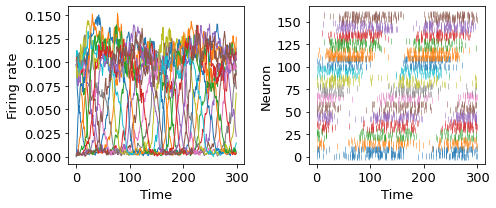

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True)

# activations
axs[0].plot(ths, lw=1)

nplot_cotuned = 10

for d in range(D):
    inrns = np.random.permutation(N)[:nplot_cotuned]
    tspks, cspks = ys[:, inrns, d].nonzero()
    axs[1].scatter(tspks, cspks+d*nplot_cotuned, marker='|', lw=.5)
    
set_plot(axs[0], x_label='Time', y_label='Firing rate', font_size=13)
set_plot(axs[1], x_label='Time', y_label='Neuron', font_size=13)

fig.savefig('figs/main/5_seq_fluc_full.svg')

Run second version of fluctuation-driven smln to show slower sequence

In [8]:
N = 2000

MU_J_SELF = 0
MU_J_CROSS = 0
MU_J_SEQ = 0

SGM_J_SELF = 11
SGM_J_CROSS = 1
SGM_J_SEQ = 3

SGM_J = np.nan*np.zeros((D, D))
MU_J = np.nan*np.zeros((D, D))

MU_J[mself] = MU_J_SELF
MU_J[~mself] = MU_J_CROSS
MU_J[mseq] = MU_J_SEQ

SGM_J[mself] = SGM_J_SELF
SGM_J[~mself] = SGM_J_CROSS
SGM_J[mseq] = SGM_J_SEQ

J = np.nan*np.zeros((D, D, N, N))

for d_to in range(D):
    for d_from in range(D):
        J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N)*np.random.randn(N, N) + MU_J[d_to, d_from]*D/N

ntwk = SoftmaxNtwk(J)

x_0 = np.random.randn(N, D)
x_0[:, :10] *= 5
g = np.inf
t, xs, ys = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=20)

ths = ys.mean(axis=1)

..............

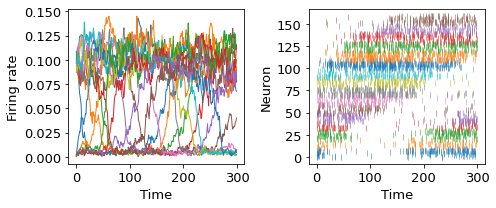

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True)

# activations
axs[0].plot(ths, lw=1)

nplot_cotuned = 10

for d in range(D):
    inrns = np.random.permutation(N)[:nplot_cotuned]
    tspks, cspks = ys[:, inrns, d].nonzero()
    axs[1].scatter(tspks, cspks+d*nplot_cotuned, marker='|', lw=.5)
    
set_plot(axs[0], x_label='Time', y_label='Firing rate', font_size=13)
set_plot(axs[1], x_label='Time', y_label='Neuron', font_size=13)

fig.savefig('figs/main/5_seq_fluc_full_slow.svg')